<a href="https://colab.research.google.com/github/WaveEmotion/Project2-MNIST/blob/main/MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Rajeev Choudhari
# 9/26/2024
# MNIST Dataset Classification Model

In [31]:
# Importing libraries
import pandas as pd
import numpy as np
import struct
from array import array
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [32]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [33]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images) / cols) + 1
    plt.figure(figsize=(30, 20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if title_text != '':
            plt.title(title_text, fontsize=15)
        index += 1

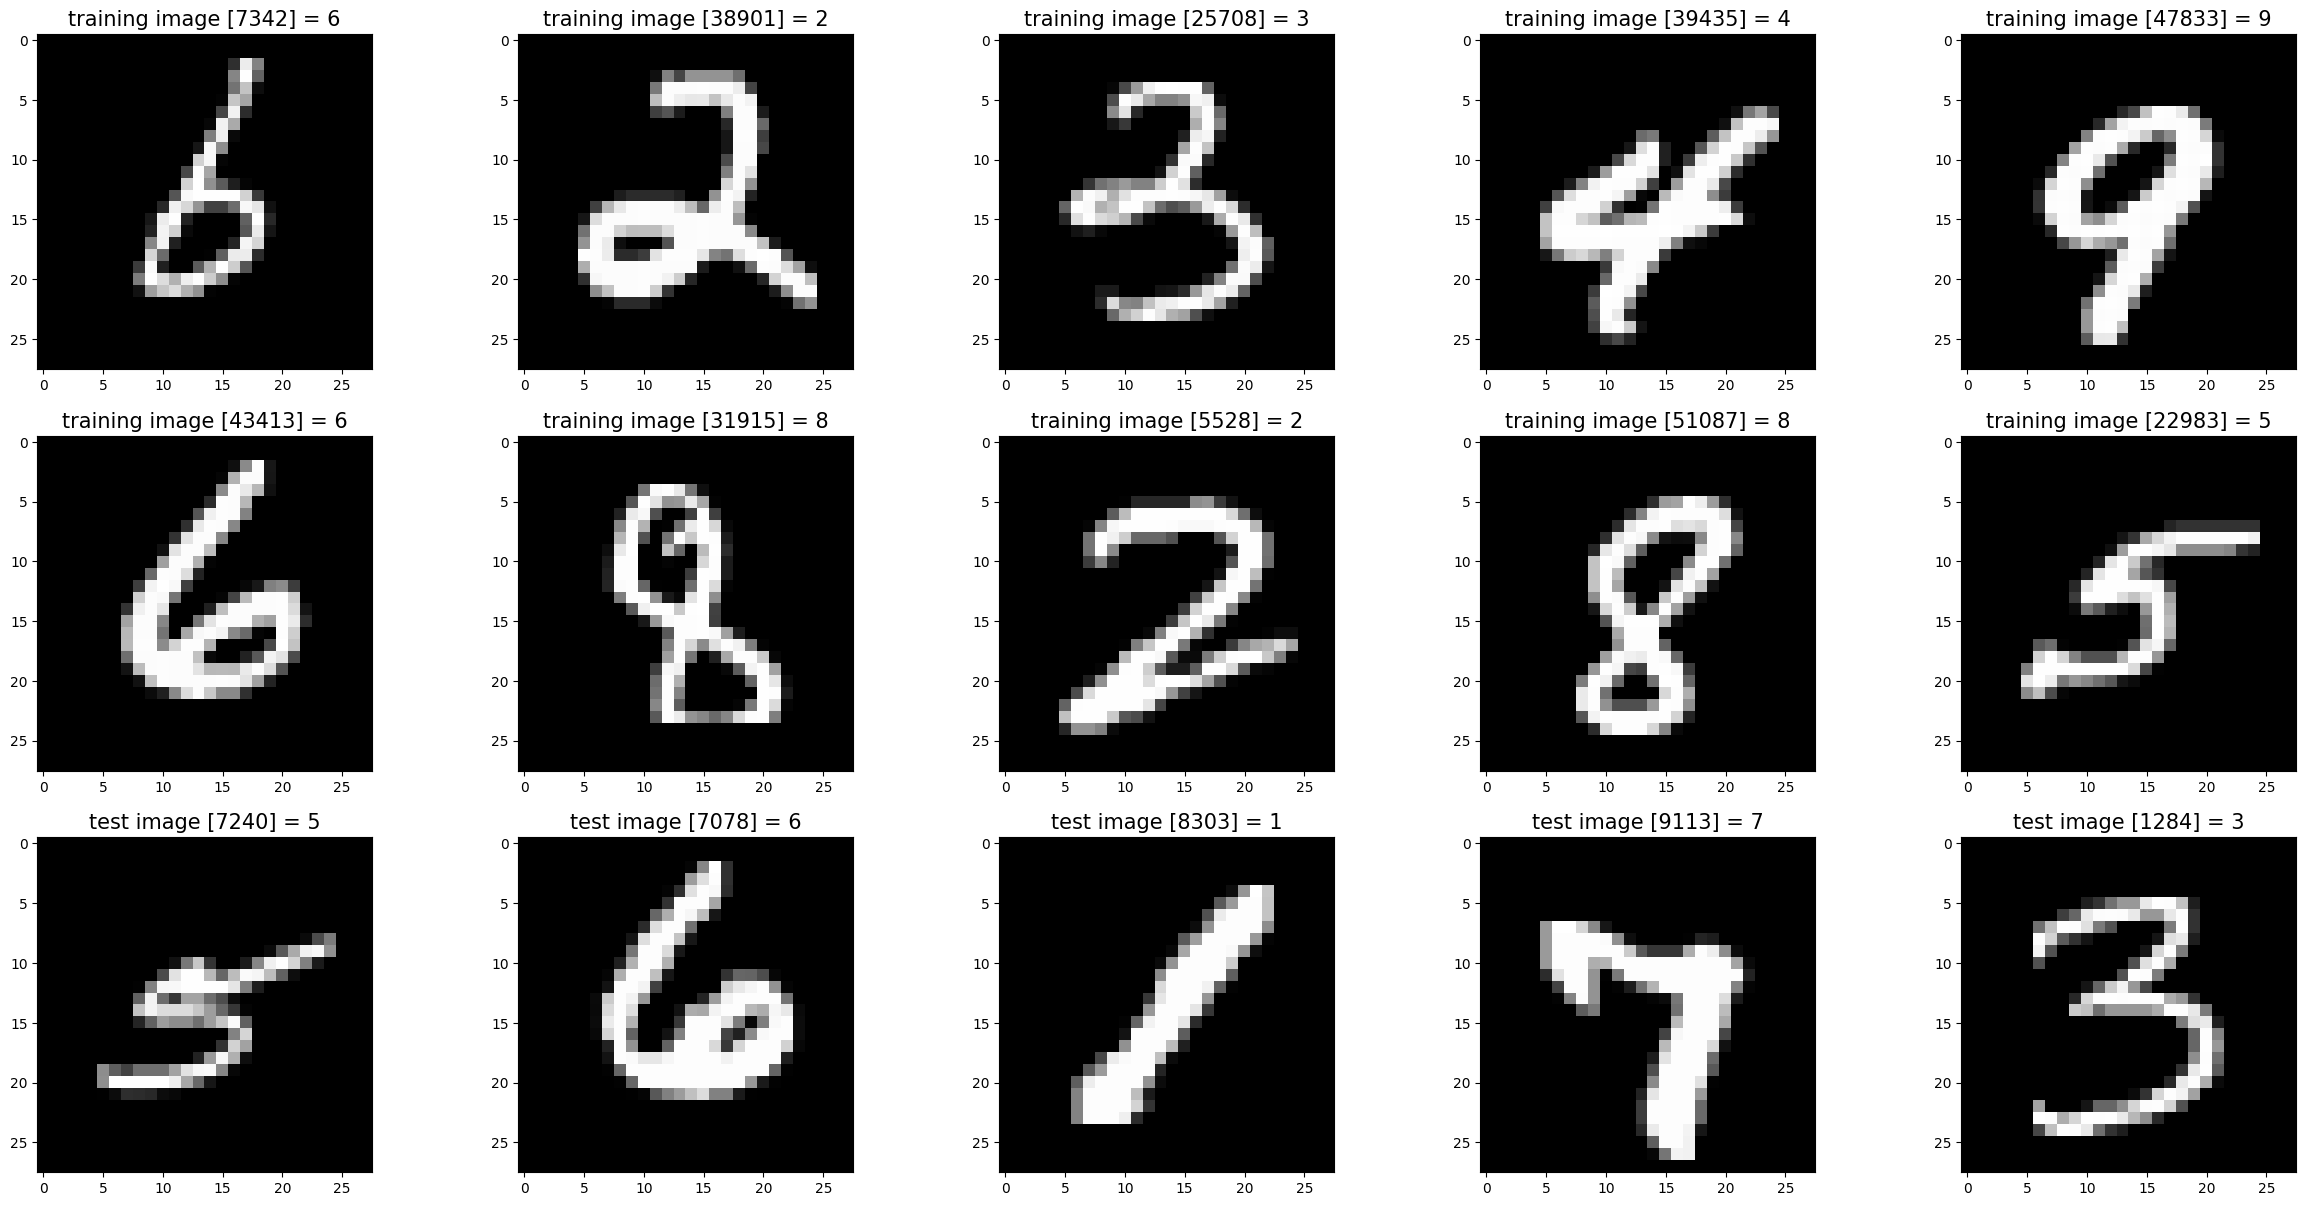

In [34]:
# Display random training and test images
images_2_show = []
titles_2_show = []
for i in range(10):
    r = random.randint(0, len(x_train) - 1)  # Randomly select training images
    images_2_show.append(x_train[r])
    titles_2_show.append(f'training image [{r}] = {y_train[r]}')

for i in range(5):
    r = random.randint(0, len(x_test) - 1)  # Randomly select test images
    images_2_show.append(x_test[r])
    titles_2_show.append(f'test image [{r}] = {y_test[r]}')

# Show the images
show_images(images_2_show, titles_2_show)
plt.show()

In [35]:
# Normalize the data (from 0-255, to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [36]:
# Reshape to add a single channel for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [37]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8976 - loss: 0.3341 - val_accuracy: 0.9861 - val_loss: 0.0411
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9852 - loss: 0.0485 - val_accuracy: 0.9899 - val_loss: 0.0311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9871 - val_loss: 0.0397
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9886 - val_loss: 0.0340
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.9891 - val_loss: 0.0371


In [40]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9856 - loss: 0.0494
Test accuracy: 0.9891


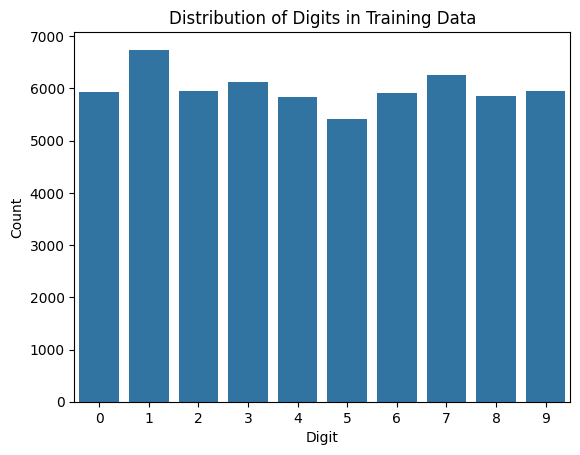

In [41]:
y_train_df = pd.DataFrame(y_train, columns=["Digit"])
sns.countplot(x="Digit", data=y_train_df)
plt.title("Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


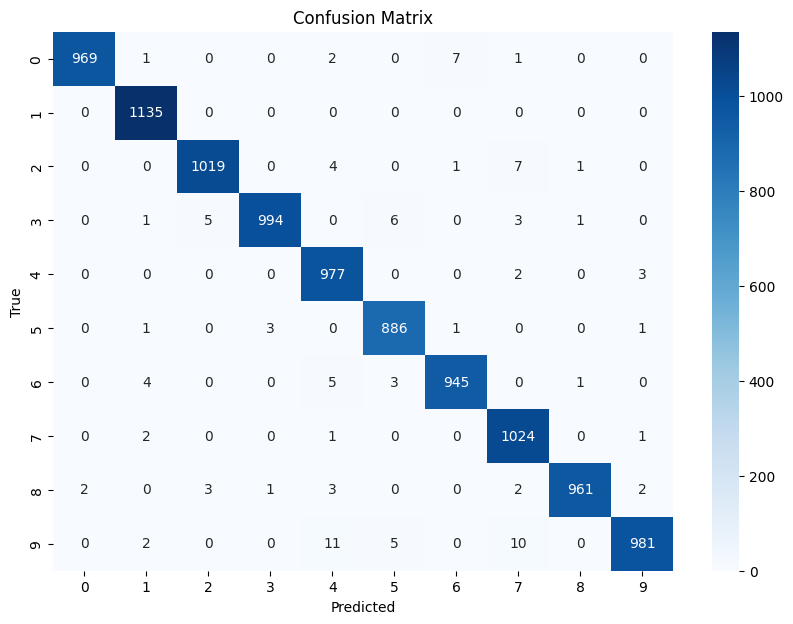

In [42]:
# Get predictions for the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()